In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [19]:
dataset=pd.read_csv('diabetes.csv')

In [20]:
x=dataset.iloc[:,0:8]
y=dataset['Outcome']
print(sorted(Counter(y).items()))

[(0, 500), (1, 268)]


In [27]:
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(x, y)
print(sorted(Counter(Y_resampled).items()))

[(0, 268), (1, 268)]


In [28]:
df['Pregnancies'] = df['Pregnancies'].astype('category')
df['Glucose'] = df['Glucose'].astype('category') 
df['BloodPressure'] = df['BloodPressure'].astype('category')
df['SkinThickness'] = df['SkinThickness'].astype('category') 
df['Insulin'] = df['Insulin'].astype('category')
df['BMI'] = df['BMI'].astype('category')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('category')
df['Age'] = df['Age'].astype('category')
df['Outcome'] = df['Outcome'].astype('category')

# use .cat.codes on `category` type to map all literals to numeric values
df['Pregnancies'] = df['Pregnancies'].cat.codes
df['Glucose'] = df['Glucose'].cat.codes
df['BloodPressure'] = df['BloodPressure'].cat.codes
df['SkinThickness'] = df['SkinThickness'].cat.codes
df['Insulin'] = df['Insulin'].cat.codes
df['BMI'] = df['BMI'].cat.codes
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].cat.codes
df['Age'] = df['Age'].cat.codes
df['Outcome'] = df['Outcome'].cat.codes

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,random_state=0)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
pred=dt.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

0.6567164179104478

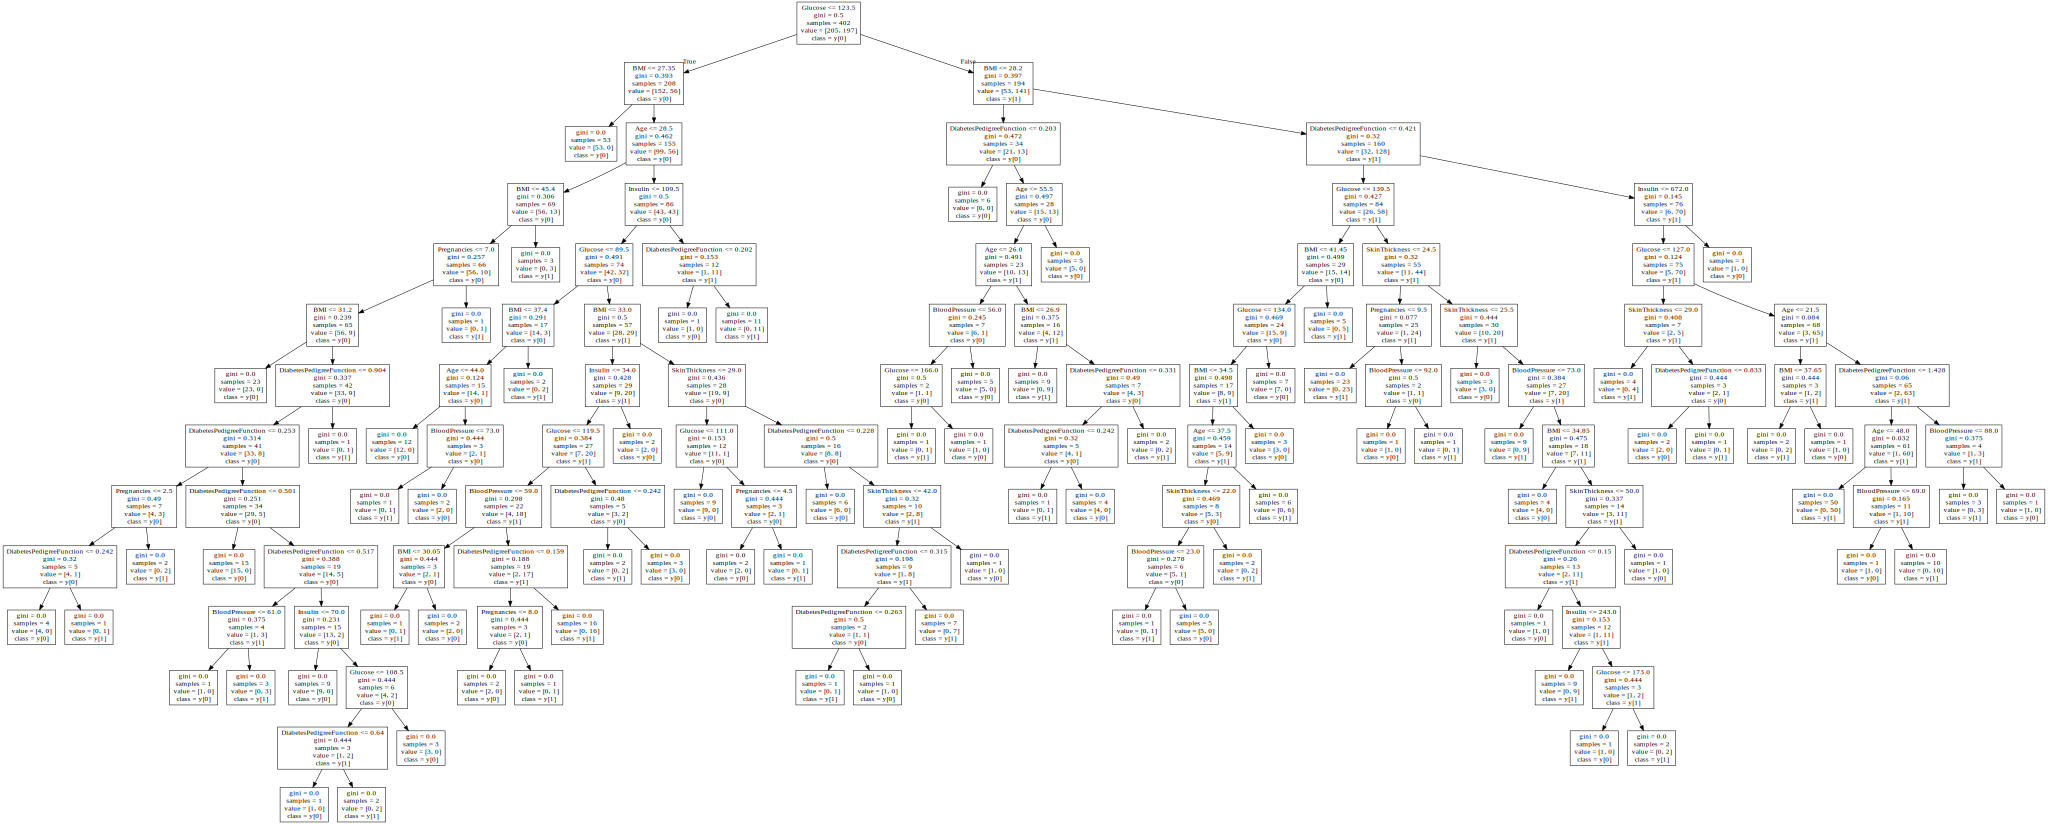

In [17]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= X_train.columns))